In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('data/stud.csv')

# Preparing X and Y Variable

In [7]:
x = df.drop(columns = ['math score'],axis=1)

In [ ]:
y = df['math score']

In [9]:
# Create Column Tranformer with 3 types of transformer
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
category_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder",category_transformer,cat_features),
    ("StandardScalar", numeric_transformer,num_features),
])


In [12]:
x = preprocessor.fit_transform(x)

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y,train_size=0.2,random_state=42)

In [23]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2 = r2_score(true,predicted)
    return mae,rmse,r2

In [27]:
models = {
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()
}
model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae, model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('------------------------------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


LinearRegression
Model performance for Training set
- Root Mean Squared Error: 4.9901
- Mean Absolute Error: 3.9809
- R2 Score: 0.8870
------------------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5258
- Mean Absolute Error: 4.4065
- R2 Score: 0.8683


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.4813
- Mean Absolute Error: 5.0883
- R2 Score: 0.8094
------------------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.7498
- Mean Absolute Error: 5.3471
- R2 Score: 0.8036


Ridge
Model performance for Training set
- Root Mean Squared Error: 4.9942
- Mean Absolute Error: 3.9777
- R2 Score: 0.8868
------------------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5178
- Mean Absolute Error: 4.3915
- R2 Score: 0.8687


KNeighborsRegressor
Model performance for Training set
- Root Mean Squared Error: 5.9224
- Mean Absolute

In [28]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.868726
0,LinearRegression,0.868345
7,CatBoostRegressor,0.818033
5,RandomForestRegressor,0.813592
1,Lasso,0.803563
8,AdaBoostRegressor,0.785804
6,XGBRegressor,0.754930
3,KNeighborsRegressor,0.736966
4,DecisionTreeRegressor,0.673095


In [30]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 86.83


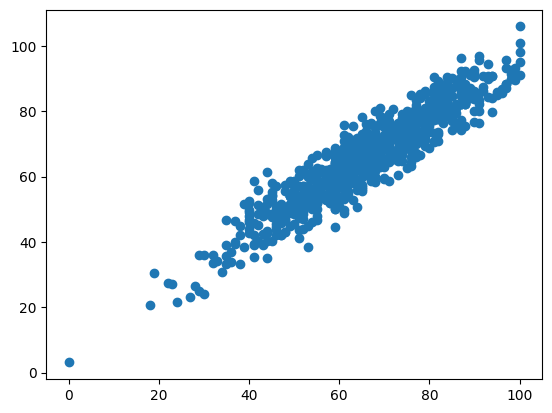

In [31]:
plt.scatter(y_test,y_pred)

<Axes: xlabel='math score'>

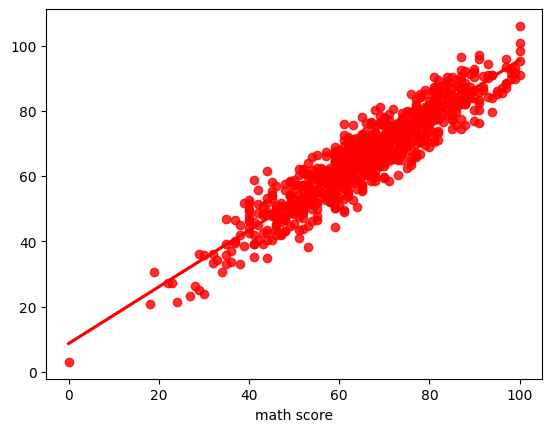

In [32]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [33]:
pred_df = pd.DataFrame({'Actual value':y_test,'Predicted Value': y_pred,'Difference':y_test-y_pred})
pred_df

,Actual value,Predicted Value,Difference
521,91,76.312627,14.687373
737,53,59.875190,-6.875190
740,80,77.421754,2.578246
660,74,77.922153,-3.922153
411,84,88.354792,-4.354792
...,...,...,...
619,65,67.607378,-2.607378
855,97,88.482397,8.517603
803,82,81.358974,0.641026
645,65,70.027290,-5.027290
